# Chapter 5: Basic Probability and Statistical Analysis using SciPy

In [2]:
# 5.1 Exploring the relationships between data and probability using SciPy
from scipy import stats

In [6]:
# Use the bimom_test() method to compute the probability of 16 heads in 20 flips
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binom_test(num_heads, num_flips, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob:.17f}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


C:\Users\meowm\AppData\Local\Temp\ipykernel_11064\3816844318.py:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  prob = stats.binom_test(num_heads, num_flips, prob_head)


In [9]:
# Using binomtest() because binom_test() is being depricated in SciPy 1.12.0
prob = stats.binomtest(num_heads, num_flips, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob.pvalue:.17f}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


In [10]:
# Probability Mass Function (pmf): Maps inputted integer values to their probability of occurence
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"The probability of seeing {num_heads} of {num_flips} heads is {prob_16_heads}")

The probability of seeing 16 of 20 heads is 0.004620552062988283


In [11]:
# Computing an array of probabilities using stats.binom.pmf()
probabilitites = stats.binom.pmf([4, 16], num_flips, prob_head)
assert probabilitites.tolist() == [prob_16_heads] * 2

In [12]:
# Computing an interval probability using stats.binom.pmf()
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()
print(f"Total sum of probabilities equals {total_prob:.14f}")

Total sum of probabilities equals 1.00000000000000


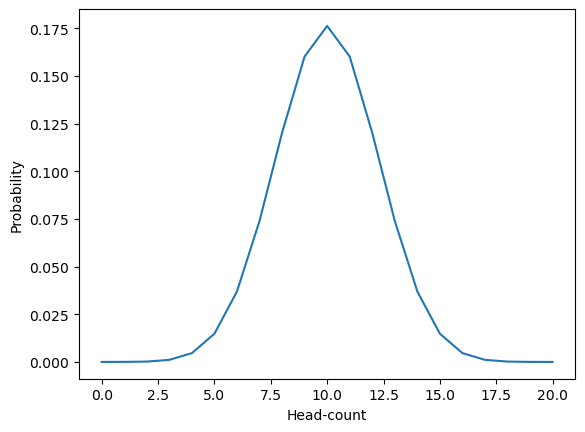

In [13]:
# Plotting a 20-coin-flip binomial distribution
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

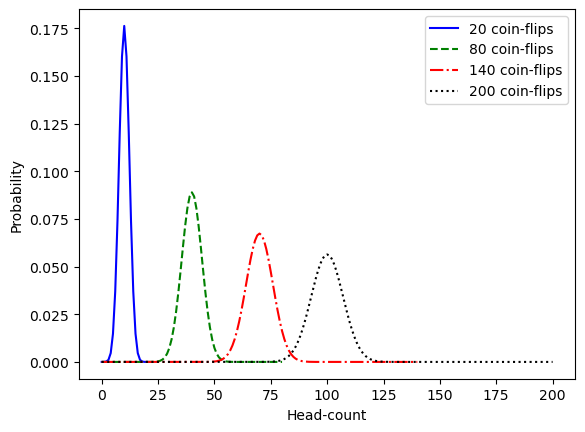

In [14]:
# Plotting 5 different binomial distributions
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
    x_values = range(num_flips + 1)
    y_values = stats.binom.pmf(x_values, num_flips, 0.5)
    plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f'{num_flips} coin-flips')

plt.legend()
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [15]:
# 5.2 Mean as a measure of centrality
import numpy as np
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

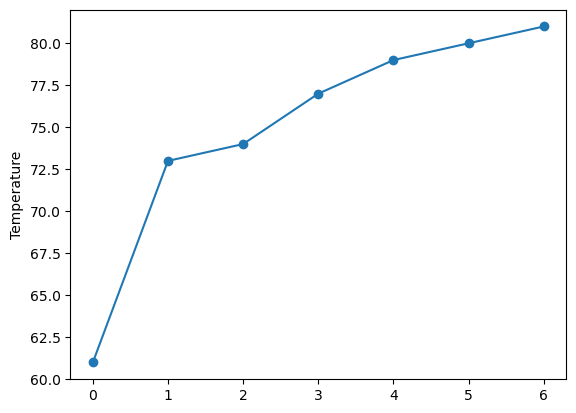

In [16]:
measurements.sort()
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('Temperature')
plt.show()

In [19]:
# Finding the midpoint temperature
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2
print(f"The midpoint temperature is {midpoint} degrees")

The midpoint temperature is 71.0 degrees


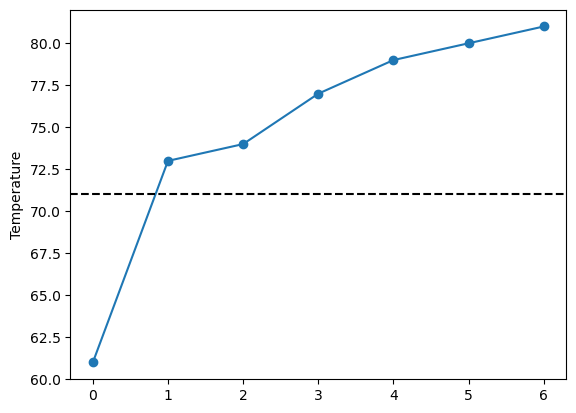

In [20]:
# Plotting the midpoint temperature
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--')
plt.ylabel('Temperature')
plt.show()

The median temperature is 77 degrees


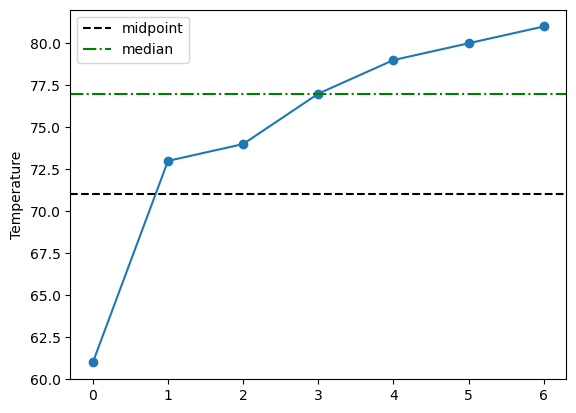

In [21]:
# Plotting the median temperature
median = measurements[3]
print(f"The median temperature is {median} degrees")
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.legend()
plt.ylabel('Temperature')
plt.show()

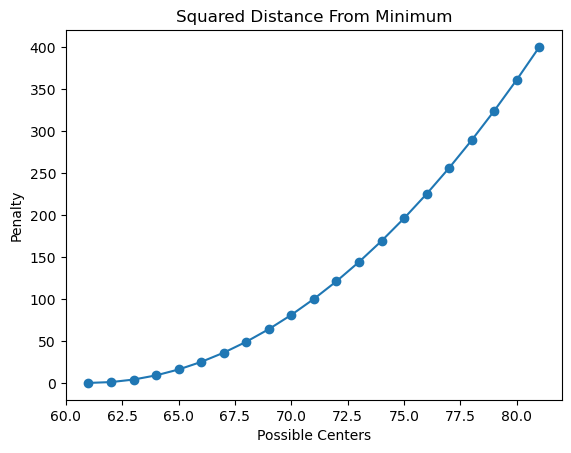

In [28]:
# Penalizing centers using the squared distance from the minimum
def squared_distance(value1, value2):
    return (value1 - value2) ** 2

possible_centers = range(measurements.min(), measurements.max() + 1)
penalties = [squared_distance(center, 61) for center in possible_centrs]
plt.plot(possible_centrs, penalties)
plt.scatter(possible_centrs, penalties)
plt.title('Squared Distance From Minimum')
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

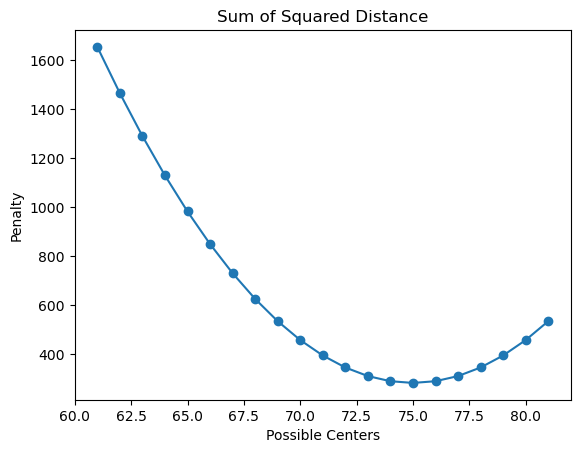

In [29]:
# Penalizing centers using the total sum of squared distance
def sum_of_squared_distance(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

penalties = [sum_of_squared_distance(center, measurements) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.title('Sum of Squared Distance')
plt.show()

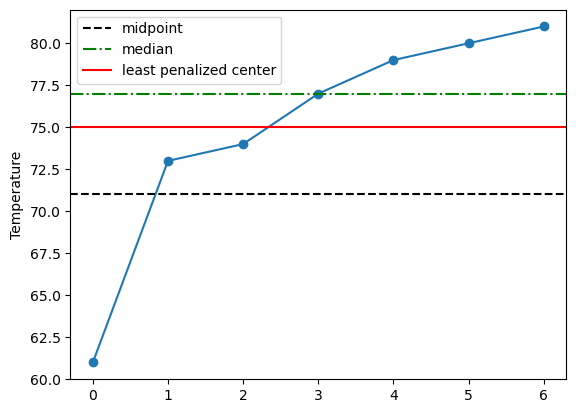

In [31]:
# Plotting the least-penalized temperature
least_penalized = 75
assert least_penalized == possible_centers[np.argmin(penalties)]


plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint')
plt.axhline(median, color='g', linestyle='-.', label='median')
plt.axhline(least_penalized, color='r', linestyle='-', label='least penalized center')
plt.legend()
plt.ylabel('Temperature')
plt.show()

In [32]:
# Computing the least-penalized center using an average value
assert measurements.sum() / measurements.size == least_penalized

In [33]:
# Arithmetic Mean: A summed array of values divided by array size
# can also use np.mean or np.average
mean = measurements.mean()
assert mean == least_penalized
assert mean == np.mean(measurements)
assert mean == np.average(measurements)

In [34]:
# Passing weights into np.average
equal_weights = [1] * 7
assert mean == np.average(measurements, weights=equal_weights)

unequal_weights = [100] + [1] * 6
assert mean != np.average(measurements, weights=unequal_weights)

In [35]:
# Computing the weighted mean of duplicate values
weighted_mean = np.average([75, 77], weights=[9, 1])
print(f"The mean is {weighted_mean}")
assert weighted_mean == np.mean(9 * [75] + [77])

The mean is 75.2


In [36]:
# Computing the weighted mean of relative weights
assert weighted_mean == np.average([75, 77], weights=[900, 100])
assert weighted_mean == np.average([75, 77], weights=[0.9, 0.1])

The mean of the binomial is 10.00 heads


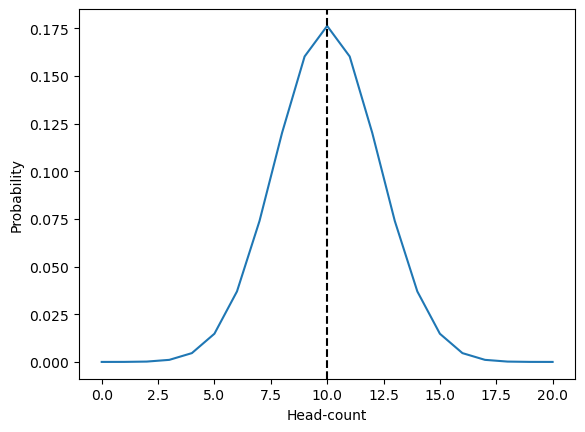

In [37]:
# 5.2.1 Finding the mean of a probability distribution
# Computing the mean of a binomial distribution
num_flips = 20
interval_all_counts = range(num_flips + 1)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
mean_binomial = np.average(interval_all_counts, weights=probabilities)
print(f"The mean of the binomial is {mean_binomial:.2f} heads")
plt.plot(interval_all_counts, probabilities)
plt.axvline(mean_binomial, color='k', linestyle="--")
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [38]:
# Computing the binomial mean using SciPy
assert stats.binom.mean(num_flips, 0.5) == 10

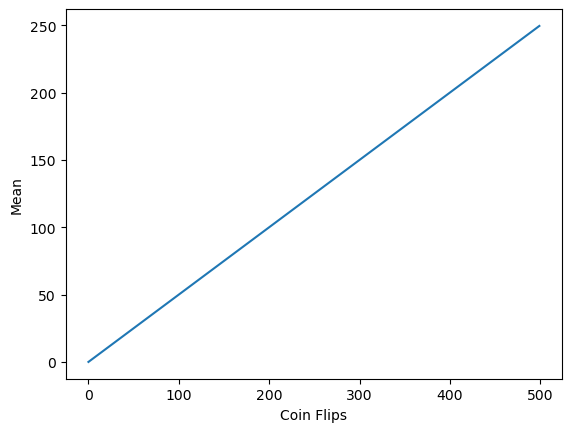

In [39]:
# Plotting multiple binomial means
means = [stats.binom.mean(num_flips, 0.5) for num_flips in range(500)]
plt.plot(range(500), means)
plt.xlabel('Coin Flips')
plt.ylabel('Mean')
plt.show()
# The mean is linearly related to the number of coin flips

In [40]:
# Predicting the mean of a Bernoulli distribution
num_flips = 1
assert stats.binom.mean(num_flips, 0.5) == 0.5

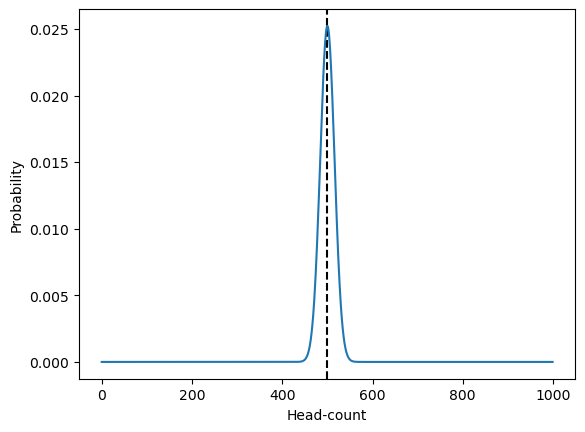

In [41]:
# Predicting the mean of a 1000 coin-flip distribution
num_flips = 1000
assert stats.binom.mean(num_flips, 0.5) == 500

interval_all_counts = range(num_flips)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, 0.5)
plt.axvline(500, color='k', linestyle='--')
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [42]:
# 5.3 Variance as a measure of dispersion
# Dispersion: The scattering of data points around some central value, the smaller, the more predictible the data
# Measuring the means of multiple temperature arrays
california = np.array([52, 77, 96])
kentucky = np.array([71, 75, 79])

print(f"Mean California temperature is {california.mean()}")
print(f"Mean Kentucky temperature is {kentucky.mean()}")

Mean California temperature is 75.0
Mean Kentucky temperature is 75.0


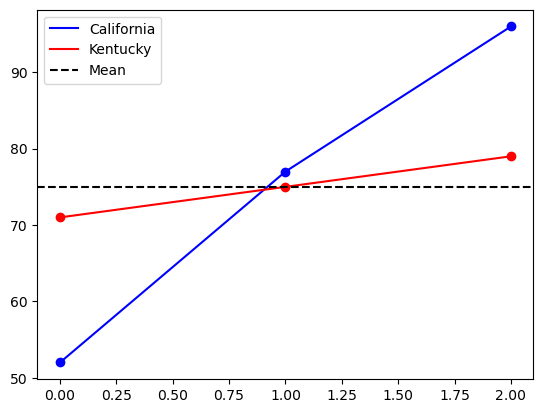

In [44]:
# Visualizing the difference in dispersion
plt.plot(range(3), california, color='b', label='California')
plt.scatter(range(3), california, color='b')
plt.plot(range(3), kentucky, color='r', label='Kentucky')
plt.scatter(range(3), kentucky, color='r')
plt.axhline(75, color='k', linestyle='--', label='Mean')
plt.legend()
plt.show()

In [45]:
# Sum of Squares: Sum of squared idstances from the mean; used as penalties for calculating distances from the mean
# Computing California's sum of squares
def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)

california_sum_squares = sum_of_squares(california)
print(f"California's sum of squares is {california_sum_squares}")

California's sum of squares is 974.0


In [46]:
# Computing Kentucky's sum of squares (predicted to be much smaller)
kentucky_sum_squares = sum_of_squares(kentucky)
print(f"Kentucky's sum of squares is {kentucky_sum_squares}")

Kentucky's sum of squares is 32.0


In [47]:
# Computing sum of squares after array duplication
california_duplicated = np.array(california.tolist() * 2)
duplicated_sum_squares = sum_of_squares(california_duplicated)
print(f"Duplicated California sum of squares is {duplicated_sum_squares}")
assert duplicated_sum_squares == 2 * california_sum_squares


Duplicated California sum of squares is 1948.0


In [48]:
# The above output proves that the sum of squares is not a good measure of dispersion 
# because it is dependent on size of the inputted array
# Dividing sum of squares by array size
value1 = california_sum_squares / california.size
value2 = duplicated_sum_squares / california_duplicated.size
assert value1 == value2

In [49]:
# Variance: Dividing the sum of squares by the number of measurements
# Computing the variance from the mean squared distance
def variance(data):
    mean = np.mean(data)
    return np.mean([squared_distance(value, mean) for value in data])

assert variance(california) == california_sum_squares / california.size

In [50]:
# Computing the variance after array duplication
assert variance(california) == variance(california_duplicated)

In [51]:
# Comparing the variances of California and Kentucky
california_variance = variance(california)
kentucky_variance = variance(kentucky)
print(f"California Variance is {california_variance}")
print(f"Kentucky Variance is {kentucky_variance}")

California Variance is 324.6666666666667
Kentucky Variance is 10.666666666666666


In [52]:
# Computing the variance using NumPy's np.var()
assert california_variance == california.var()
assert kentucky_variance == kentucky.var()

In [53]:
# Variance is based on the mean, so computing a weighted mean means that we need a weighted variance
# Computing the weighted variance using np.average
def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data]
    return np.average(squared_distances, weights=weights)

assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

In [54]:
# 5.3.1 Finding the variance of a probability distribution
# Computing the variance of a binomial distribution
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head)
variance_binomial = weighted_variance(interval_all_counts, probabilities)
print(f"The variance of the binomial is {variance_binomial:.2f} heads")

The variance of the binomial is 5.00 heads


In [55]:
# Computing the binomial variance using SciPy's stats.binom.var()
assert stats.binom.var(20, prob_head) == 5.0
assert stats.binom.var(20, prob_head) == stats.binom.mean(20, prob_head) / 2

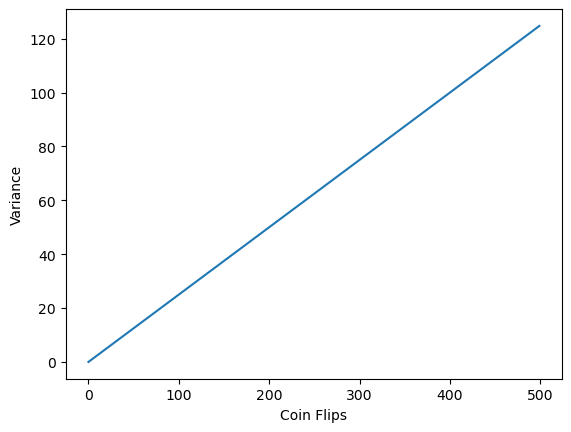

In [56]:
# Plotting multiple binomial variances
variances = [stats.binom.var(num_flips, prob_head) for num_flips in range(500)]
plt.plot(range(500), variances)
plt.xlabel('Coin Flips')
plt.ylabel('Variance')
plt.show()
# Binomial Variance is linearly related to the coin-flip count, with variance equal to 1/4th the flip count

In [57]:
# Predicting binomial variances
assert stats.binom.var(1, 0.5) == 0.25
assert stats.binom.var(1000, 0.5) == 250

In [58]:
# Standard Deviation: The square root of the variance
# Computing the standard deviation
data = [1, 2, 3]
standard_deviation = np.std(data)
assert standard_deviation ** 2 == np.var(data)

In [ ]:
# Key Words / Notes
# Probability Mass Function: Maps inputted integer values to their probability of occurence
# Sum of Squares: Minimized by the mean
# Variance: A good measure of a dataset's dispersion; equals the average squared distance of the data point from the mean
# Standard Deviation: Alternate measure of dispersion; equals the square root of the variance; maintains
#    units used in a dataset.